In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')


gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9,
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_8 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_9 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_10 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]



def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset

ncep

,L,MON,LDC_SST_NCEP_CFSv2,LDC_SST_NCEP_CFSv2_ONETWO,LDC_SST_NCEP_CFSv2_THREE,LDC_SST_NCEP_CFSv2_FOUR
0,1.5,0000 1 Jan 1991,26.82296,26.11494,26.10883,28.42231
1,2.5,0000 1 Jan 1991,27.03892,26.86177,26.66147,28.34857
2,3.5,0000 1 Jan 1991,27.53521,26.47297,27.11292,28.56705
3,4.5,0000 1 Jan 1991,27.87829,25.39688,27.09458,28.87816
4,5.5,0000 1 Jan 1991,27.67657,24.18736,26.52200,28.92806
...,...,...,...,...,...,...
2875,4.5,0000 1 Dec 2020,26.98239,26.71247,26.78753,28.30210
2876,5.5,0000 1 Dec 2020,27.50360,25.98112,26.97073,28.69814
2877,6.5,0000 1 Dec 2020,27.49074,25.01752,26.61639,28.79242
2878,7.5,0000 1 Dec 2020,26.92092,24.17575,25.89700,28.49155


In [21]:
def ncep_onset_finder(dict):

    ncep_temp = ncep.copy()

    # Query the DataFrame
    ncep_onset = ncep_temp[
        (ncep_temp['TAR'].dt.year == dict["year"]) &
        (ncep_temp['TAR'].dt.month == dict["month"]) &
        (ncep_temp['TAR'].dt.day == dict["day"])
    ]
    return ncep_onset
    
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]
ncep = ncep.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the ncep DataFrame
ncep.loc[:, 'OBS_NINO3.4_L3'] = ncep['TAR'].map(obs_dict)

# Calculate BIAS
ncep.loc[:, 'BIAS'] = ncep['LDC_SST_NCEP_CFSv2'] - ncep['OBS_NINO3.4_L3']
ncep_warm_onset_dfs = {}
ncep_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    ncep_warm_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_warm_onset = pd.concat([ncep_warm_onset_dfs[key] for key in ncep_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    ncep_cold_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_cold_onset = pd.concat([ncep_cold_onset_dfs[key] for key in ncep_cold_onset_dfs.keys()], ignore_index=True)

ncep_all_onset = pd.concat([ncep_cold_onset,ncep_warm_onset], ignore_index=True)
ncep_all_onset['BIAS_ABS'] = ncep_all_onset['BIAS'].abs()
ncep_cold_onset['BIAS_ABS'] = ncep_cold_onset['BIAS'].abs()
ncep_warm_onset['BIAS_ABS'] = ncep_warm_onset['BIAS'].abs()


ncep_warm_onset_mean = ncep_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
ncep_cold_onset_mean = ncep_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
ncep_all_onset_mean = ncep_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

ncep_warm_onset_mean.to_csv('../Resources/ncep_warm_onset_mean.csv', index=False)
ncep_all_onset_mean.to_csv('../Resources/ncep_all_onset_mean.csv', index=False)
ncep_cold_onset_mean.to_csv('../Resources/ncep_cold_onset_mean.csv', index=False)
ncep_warm_onset.to_csv('../Resources/ncep_warm_onset.csv', index=False)
ncep_all_onset.to_csv('../Resources/ncep_all_onset.csv', index=False)
ncep_cold_onset.to_csv('../Resources/ncep_cold_onset.csv', index=False)

ncep_all_onset_mean


,L,BIAS_ABS
0,1.5,0.566410
1,2.5,0.714765
2,3.5,0.814804
3,4.5,0.683347
4,5.5,0.616382
5,6.5,0.659879
6,7.5,0.693599
7,8.5,0.633806


In [22]:
def nasa_onset_finder(dict):

    nasa_temp = nasa.copy()

    # Query the DataFrame
    nasa_onset = nasa_temp[
        (nasa_temp['TAR'].dt.year == dict["year"]) &
        (nasa_temp['TAR'].dt.month == dict["month"]) &
        (nasa_temp['TAR'].dt.day == dict["day"])
    ]
    return nasa_onset
    
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]
nasa = nasa.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nasa DataFrame
nasa.loc[:, 'OBS_NINO3.4_L3'] = nasa['TAR'].map(obs_dict)

# Calculate BIAS
nasa.loc[:, 'BIAS'] = nasa['LDC_SST_NASA_GEOSS2S'] - nasa['OBS_NINO3.4_L3']
nasa_warm_onset_dfs = {}
nasa_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    nasa_warm_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_warm_onset = pd.concat([nasa_warm_onset_dfs[key] for key in nasa_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nasa_cold_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_cold_onset = pd.concat([nasa_cold_onset_dfs[key] for key in nasa_cold_onset_dfs.keys()], ignore_index=True)

nasa_all_onset = pd.concat([nasa_cold_onset,nasa_warm_onset], ignore_index=True)
nasa_all_onset['BIAS_ABS'] = nasa_all_onset['BIAS'].abs()
nasa_cold_onset['BIAS_ABS'] = nasa_cold_onset['BIAS'].abs()
nasa_warm_onset['BIAS_ABS'] = nasa_warm_onset['BIAS'].abs()

nasa_warm_onset_mean = nasa_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nasa_cold_onset_mean = nasa_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nasa_all_onset_mean = nasa_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

nasa_warm_onset_mean.to_csv('../Resources/nasa_warm_onset_mean.csv', index=False)
nasa_all_onset_mean.to_csv('../Resources/nasa_all_onset_mean.csv', index=False)
nasa_cold_onset_mean.to_csv('../Resources/nasa_cold_onset_mean.csv', index=False)
nasa_warm_onset.to_csv('../Resources/nasa_warm_onset.csv', index=False)
nasa_all_onset.to_csv('../Resources/nasa_all_onset.csv', index=False)
nasa_cold_onset.to_csv('../Resources/nasa_cold_onset.csv', index=False)

nasa_all_onset_mean


,L,BIAS_ABS
0,1.5,0.347912
1,2.5,0.357369
2,3.5,0.334752
3,4.5,0.463153
4,5.5,0.540198
5,6.5,0.668743
6,7.5,0.851347


In [23]:
def canada_onset_finder(dict):

    canada_temp = canada.copy()

    # Query the DataFrame
    canada_onset = canada_temp[
        (canada_temp['TAR'].dt.year == dict["year"]) &
        (canada_temp['TAR'].dt.month == dict["month"]) &
        (canada_temp['TAR'].dt.day == dict["day"])
    ]
    return canada_onset
    
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]
canada = canada.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canada DataFrame
canada.loc[:, 'OBS_NINO3.4_L3'] = canada['TAR'].map(obs_dict)

# Calculate BIAS
canada.loc[:, 'BIAS'] = canada['LDC_SST_CanSIPS_IC4'] - canada['OBS_NINO3.4_L3']
canada_warm_onset_dfs = {}
canada_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    canada_warm_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_warm_onset = pd.concat([canada_warm_onset_dfs[key] for key in canada_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canada_cold_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_cold_onset = pd.concat([canada_cold_onset_dfs[key] for key in canada_cold_onset_dfs.keys()], ignore_index=True)

canada_all_onset = pd.concat([canada_cold_onset,canada_warm_onset], ignore_index=True)
canada_all_onset['BIAS_ABS'] = canada_all_onset['BIAS'].abs()
canada_cold_onset['BIAS_ABS'] = canada_cold_onset['BIAS'].abs()
canada_warm_onset['BIAS_ABS'] = canada_warm_onset['BIAS'].abs()

canada_warm_onset_mean = canada_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
canada_cold_onset_mean = canada_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
canada_all_onset_mean = canada_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

canada_warm_onset_mean.to_csv('../Resources/canada_warm_onset_mean.csv', index=False)
canada_all_onset_mean.to_csv('../Resources/canada_all_onset_mean.csv', index=False)
canada_cold_onset_mean.to_csv('../Resources/canada_cold_onset_mean.csv', index=False)
canada_warm_onset.to_csv('../Resources/canada_warm_onset.csv', index=False)
canada_all_onset.to_csv('../Resources/canada_all_onset.csv', index=False)
canada_cold_onset.to_csv('../Resources/canada_cold_onset.csv', index=False)

canada_all_onset_mean


,L,BIAS_ABS
0,1.5,0.528700
1,2.5,0.642489
2,3.5,0.778089
3,4.5,0.877084
4,5.5,1.036595
5,6.5,1.076780
6,7.5,1.135741
7,8.5,1.207507
8,9.5,1.217463
9,10.5,1.255752


In [24]:
def cola_onset_finder(dict):

    cola_temp = cola.copy()

    # Query the DataFrame
    cola_onset = cola_temp[
        (cola_temp['TAR'].dt.year == dict["year"]) &
        (cola_temp['TAR'].dt.month == dict["month"]) &
        (cola_temp['TAR'].dt.day == dict["day"])
    ]
    return cola_onset
    
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]
cola = cola.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the cola DataFrame
cola.loc[:, 'OBS_NINO3.4_L3'] = cola['TAR'].map(obs_dict)

# Calculate BIAS
cola.loc[:, 'BIAS'] = cola['LDC_SST_COLA_CESM1'] - cola['OBS_NINO3.4_L3']
cola_warm_onset_dfs = {}
cola_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    cola_warm_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_warm_onset = pd.concat([cola_warm_onset_dfs[key] for key in cola_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    cola_cold_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_cold_onset = pd.concat([cola_cold_onset_dfs[key] for key in cola_cold_onset_dfs.keys()], ignore_index=True)

cola_all_onset = pd.concat([cola_cold_onset,cola_warm_onset], ignore_index=True)
cola_all_onset['BIAS_ABS'] = cola_all_onset['BIAS'].abs()
cola_cold_onset['BIAS_ABS'] = cola_cold_onset['BIAS'].abs()
cola_warm_onset['BIAS_ABS'] = cola_warm_onset['BIAS'].abs()

cola_warm_onset_mean = cola_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
cola_cold_onset_mean = cola_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
cola_all_onset_mean = cola_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

cola_warm_onset_mean.to_csv('../Resources/cola_warm_onset_mean.csv', index=False)
cola_all_onset_mean.to_csv('../Resources/cola_all_onset_mean.csv', index=False)
cola_cold_onset_mean.to_csv('../Resources/cola_cold_onset_mean.csv', index=False)
cola_warm_onset.to_csv('../Resources/cola_warm_onset.csv', index=False)
cola_all_onset.to_csv('../Resources/cola_all_onset.csv', index=False)
cola_cold_onset.to_csv('../Resources/cola_cold_onset.csv', index=False)

cola_all_onset_mean


,L,BIAS_ABS
0,1.5,0.644693
1,2.5,0.929965
2,3.5,1.078404
3,4.5,1.095718
4,5.5,1.095146
5,6.5,1.077847
6,7.5,1.116489
7,8.5,0.995280
8,9.5,0.987236
9,10.5,0.852964


In [25]:
def canesm_onset_finder(dict):

    canesm_temp = canesm.copy()

    # Query the DataFrame
    canesm_onset = canesm_temp[
        (canesm_temp['TAR'].dt.year == dict["year"]) &
        (canesm_temp['TAR'].dt.month == dict["month"]) &
        (canesm_temp['TAR'].dt.day == dict["day"])
    ]
    return canesm_onset
    
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]
canesm = canesm.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canesm DataFrame
canesm.loc[:, 'OBS_NINO3.4_L3'] = canesm['TAR'].map(obs_dict)

# Calculate BIAS
canesm.loc[:, 'BIAS'] = canesm['LDC_SST_CanESM5'] - canesm['OBS_NINO3.4_L3']
canesm_warm_onset_dfs = {}
canesm_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    canesm_warm_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_warm_onset = pd.concat([canesm_warm_onset_dfs[key] for key in canesm_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canesm_cold_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_cold_onset = pd.concat([canesm_cold_onset_dfs[key] for key in canesm_cold_onset_dfs.keys()], ignore_index=True)

canesm_all_onset = pd.concat([canesm_cold_onset,canesm_warm_onset], ignore_index=True)
canesm_all_onset['BIAS_ABS'] = canesm_all_onset['BIAS'].abs()
canesm_cold_onset['BIAS_ABS'] = canesm_cold_onset['BIAS'].abs()
canesm_warm_onset['BIAS_ABS'] = canesm_warm_onset['BIAS'].abs()

canesm_warm_onset_mean = canesm_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
canesm_cold_onset_mean = canesm_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
canesm_all_onset_mean = canesm_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

canesm_warm_onset_mean.to_csv('../Resources/canesm_warm_onset_mean.csv', index=False)
canesm_all_onset_mean.to_csv('../Resources/canesm_all_onset_mean.csv', index=False)
canesm_cold_onset_mean.to_csv('../Resources/canesm_cold_onset_mean.csv', index=False)
canesm_warm_onset.to_csv('../Resources/canesm_warm_onset.csv', index=False)
canesm_all_onset.to_csv('../Resources/canesm_all_onset.csv', index=False)
canesm_cold_onset.to_csv('../Resources/canesm_cold_onset.csv', index=False)

canesm_all_onset_mean


,L,BIAS_ABS
0,1.5,0.315074
1,2.5,0.344589
2,3.5,0.397944
3,4.5,0.505670
4,5.5,0.552411
5,6.5,0.511128
6,7.5,0.493067
7,8.5,0.611041
8,9.5,0.713328
9,10.5,0.651550


In [26]:
def nemo_onset_finder(dict):

    nemo_temp = nemo.copy()

    # Query the DataFrame
    nemo_onset = nemo_temp[
        (nemo_temp['TAR'].dt.year == dict["year"]) &
        (nemo_temp['TAR'].dt.month == dict["month"]) &
        (nemo_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_onset
    
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]
nemo = nemo.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo DataFrame
nemo.loc[:, 'OBS_NINO3.4_L3'] = nemo['TAR'].map(obs_dict)

# Calculate BIAS
nemo.loc[:, 'BIAS'] = nemo['LDC_SST_GEM52_NEMO'] - nemo['OBS_NINO3.4_L3']
nemo_warm_onset_dfs = {}
nemo_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    nemo_warm_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_warm_onset = pd.concat([nemo_warm_onset_dfs[key] for key in nemo_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_cold_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_cold_onset = pd.concat([nemo_cold_onset_dfs[key] for key in nemo_cold_onset_dfs.keys()], ignore_index=True)

nemo_all_onset = pd.concat([nemo_cold_onset,nemo_warm_onset], ignore_index=True)
nemo_all_onset['BIAS_ABS'] = nemo_all_onset['BIAS'].abs()
nemo_cold_onset['BIAS_ABS'] = nemo_cold_onset['BIAS'].abs()
nemo_warm_onset['BIAS_ABS'] = nemo_warm_onset['BIAS'].abs()

nemo_warm_onset_mean = nemo_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nemo_cold_onset_mean = nemo_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nemo_all_onset_mean = nemo_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

nemo_warm_onset_mean.to_csv('../Resources/nemo_warm_onset_mean.csv', index=False)
nemo_all_onset_mean.to_csv('../Resources/nemo_all_onset_mean.csv', index=False)
nemo_cold_onset_mean.to_csv('../Resources/nemo_cold_onset_mean.csv', index=False)
nemo_warm_onset.to_csv('../Resources/nemo_warm_onset.csv', index=False)
nemo_all_onset.to_csv('../Resources/nemo_all_onset.csv', index=False)
nemo_cold_onset.to_csv('../Resources/nemo_cold_onset.csv', index=False)

nemo_all_onset_mean


,L,BIAS_ABS
0,1.5,1.133232
1,2.5,1.375174
2,3.5,1.711874
3,4.5,1.915616
4,5.5,2.135784
5,6.5,2.302957
6,7.5,2.451796
7,8.5,2.659563
8,9.5,2.815491
9,10.5,2.880791


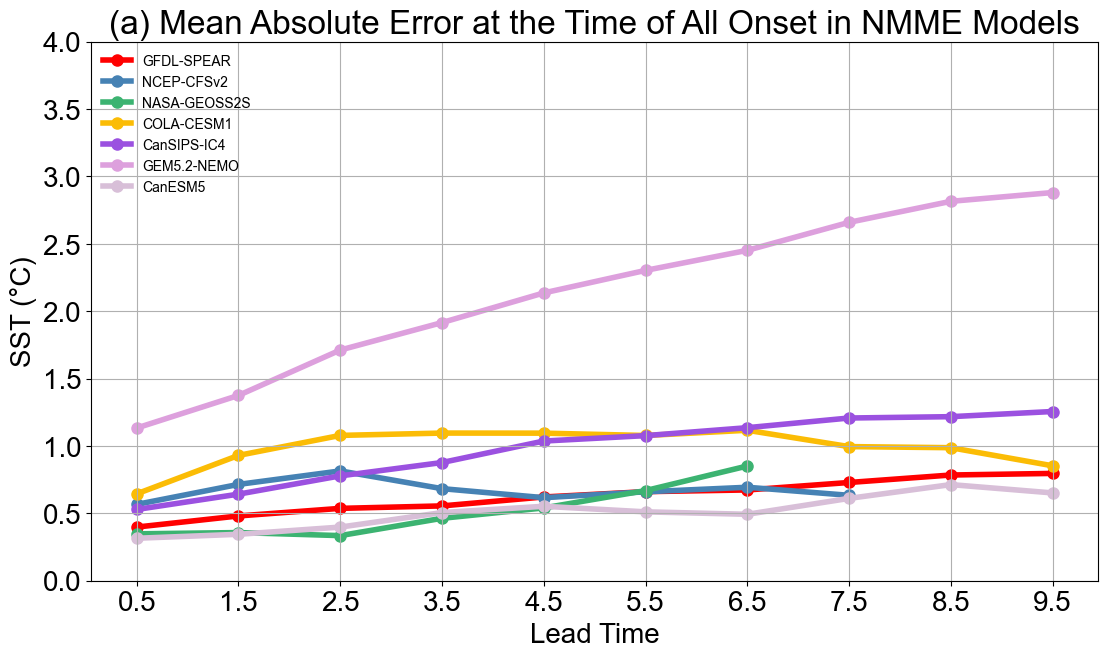

In [27]:
def all_multimodel_bias_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(gfdl_all_onset_mean['L'], gfdl_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR', zorder=1)
    plt.plot(ncep_all_onset_mean['L'], ncep_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2', zorder=1)
    plt.plot(nasa_all_onset_mean['L'], nasa_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S', zorder=1)
    plt.plot(cola_all_onset_mean['L'], cola_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1', zorder=1)
    plt.plot(canada_all_onset_mean['L'], canada_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4', zorder=1)
    plt.plot(nemo_all_onset_mean['L'], nemo_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_all_onset_mean['L'], canesm_all_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    #sns.boxplot(x='L', y='BIAS', data=gfdl_all_onset, color = 'skyblue', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_all_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'(a) Mean Absolute Error at the Time of All Onset in NMME Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_all_onset_mean['L']
    xticks_labels = gfdl_all_onset_mean['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 4)
    plt.savefig(f'../Plots/OnsetError/MAE_ALL.png', format='png')
    # Show the plot
    plt.show() 


all_multimodel_bias_visualizer()

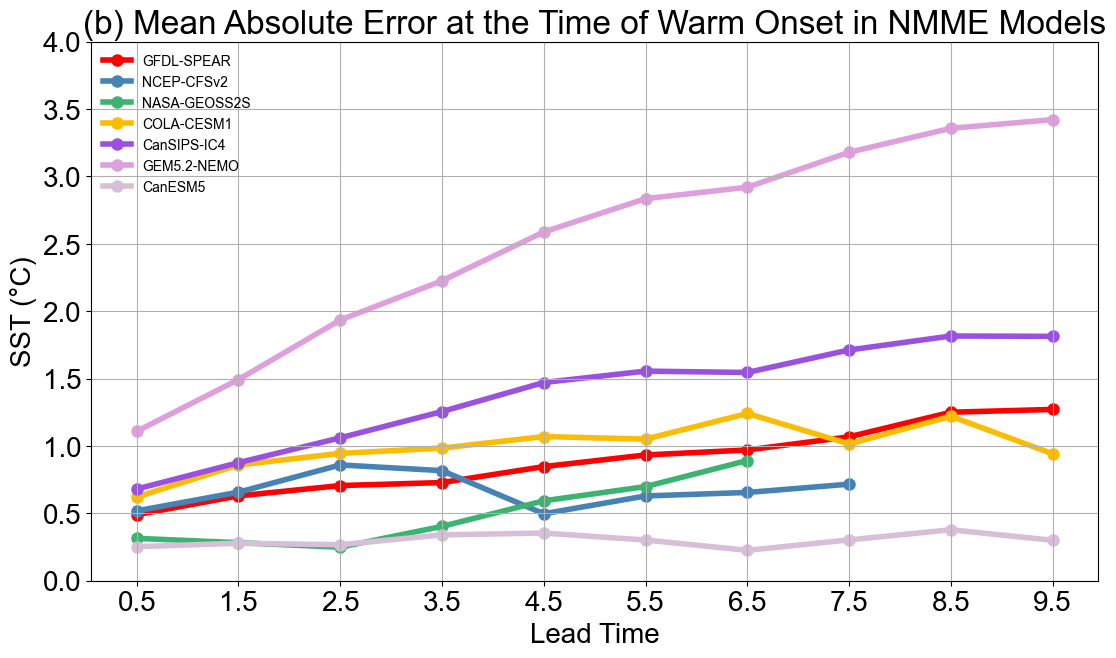

In [28]:
def warm_multimodel_bias_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(gfdl_warm_onset_mean['L'], gfdl_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR', zorder=1)
    plt.plot(ncep_warm_onset_mean['L'], ncep_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2', zorder=1)
    plt.plot(nasa_warm_onset_mean['L'], nasa_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S', zorder=1)
    plt.plot(cola_warm_onset_mean['L'], cola_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1', zorder=1)
    plt.plot(canada_warm_onset_mean['L'], canada_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4', zorder=1)
    plt.plot(nemo_warm_onset_mean['L'], nemo_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_warm_onset_mean['L'], canesm_warm_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    #sns.boxplot(x='L', y='BIAS', data=gfdl_warm_onset, color = 'skyblue', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_warm_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'(b) Mean Absolute Error at the Time of Warm Onset in NMME Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_warm_onset_mean['L']
    xticks_labels = gfdl_warm_onset_mean['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 4)
    plt.savefig(f'../Plots/OnsetError/MAE_WARM.png', format='png')
    # Show the plot
    plt.show() 


warm_multimodel_bias_visualizer()

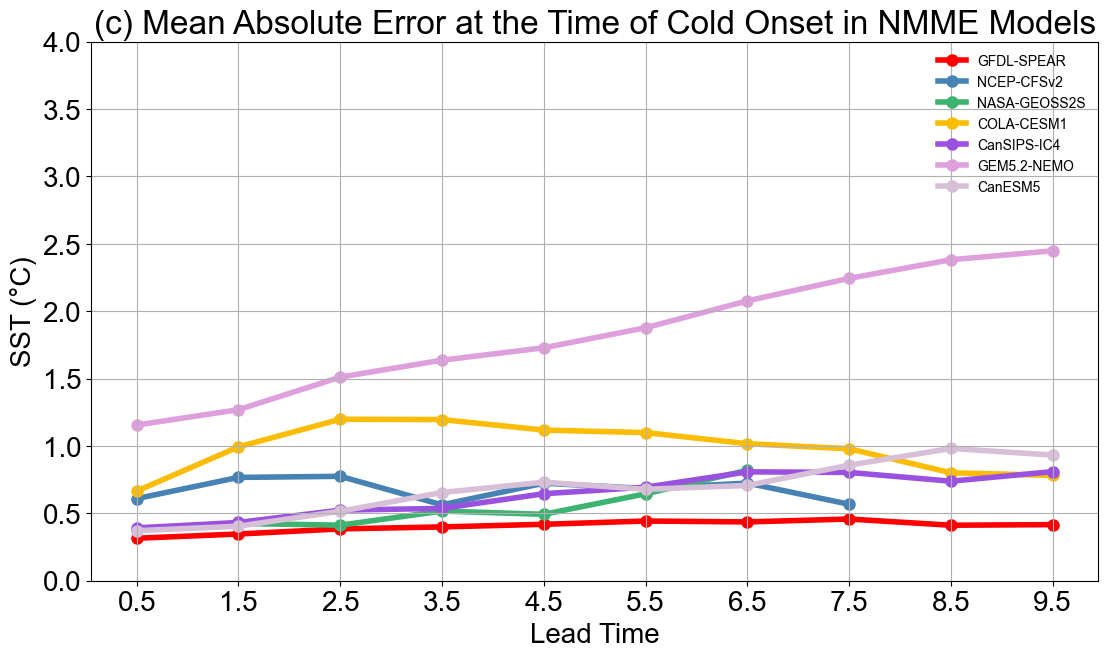

In [29]:
def cold_multimodel_bias_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(gfdl_cold_onset_mean['L'], gfdl_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR', zorder=1)
    plt.plot(ncep_cold_onset_mean['L'], ncep_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2', zorder=1)
    plt.plot(nasa_cold_onset_mean['L'], nasa_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S', zorder=1)
    plt.plot(cola_cold_onset_mean['L'], cola_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1', zorder=1)
    plt.plot(canada_cold_onset_mean['L'], canada_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4', zorder=1)
    plt.plot(nemo_cold_onset_mean['L'], nemo_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_cold_onset_mean['L'], canesm_cold_onset_mean['BIAS_ABS'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    #sns.boxplot(x='L', y='BIAS', data=gfdl_cold_onset, color = 'skyblue', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_cold_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'(c) Mean Absolute Error at the Time of Cold Onset in NMME Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_cold_onset_mean['L']
    xticks_labels = gfdl_cold_onset_mean['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 4)
    plt.savefig(f'../Plots/OnsetError/MAE_COLD.png', format='png')
    # Show the plot
    plt.show() 


cold_multimodel_bias_visualizer()

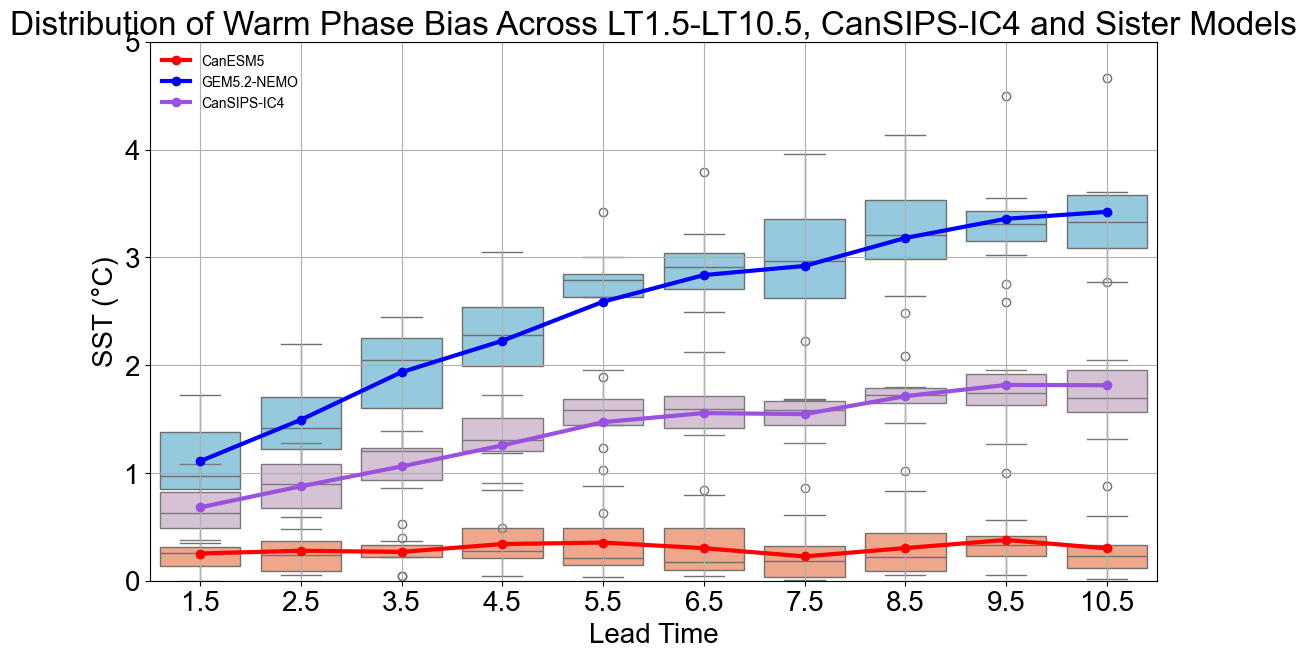

In [30]:
#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def warm_IC4_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(canesm_warm_onset_mean['L']-1.5, canesm_warm_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'CanESM5', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canesm_warm_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_warm_onset_mean['L']-1.5, nemo_warm_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_warm_onset, color = 'skyblue', zorder=1)

    plt.plot(canada_warm_onset_mean['L']-1.5, canada_warm_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='#9B51E0', label = 'CanSIPS-IC4', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canada_warm_onset, color = 'thistle', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_warm_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'Distribution of Warm Phase Bias Across LT1.5-LT10.5, CanSIPS-IC4 and Sister Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/all_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


warm_IC4_visualizer()


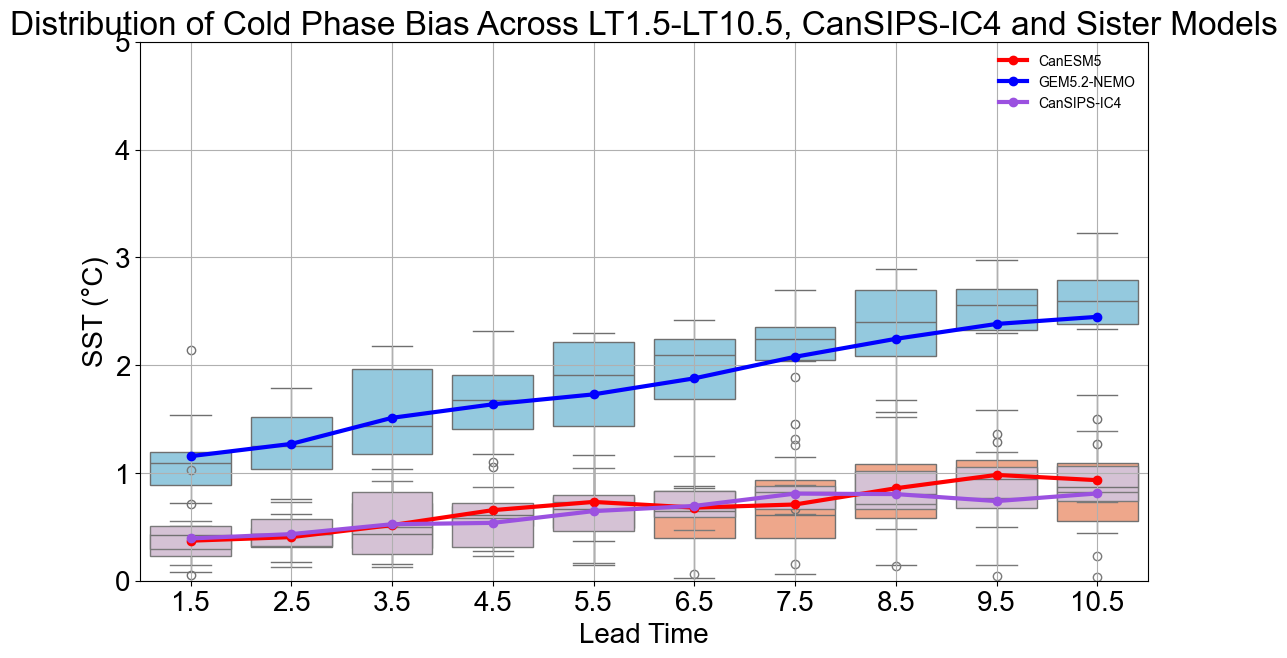

In [31]:
#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def cold_IC4_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(canesm_cold_onset_mean['L']-1.5, canesm_cold_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'CanESM5', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canesm_cold_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_cold_onset_mean['L']-1.5, nemo_cold_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_cold_onset, color = 'skyblue', zorder=1)

    plt.plot(canada_cold_onset_mean['L']-1.5, canada_cold_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='#9B51E0', label = 'CanSIPS-IC4', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canada_cold_onset, color = 'thistle', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_cold_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'Distribution of Cold Phase Bias Across LT1.5-LT10.5, CanSIPS-IC4 and Sister Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/all_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


cold_IC4_visualizer()


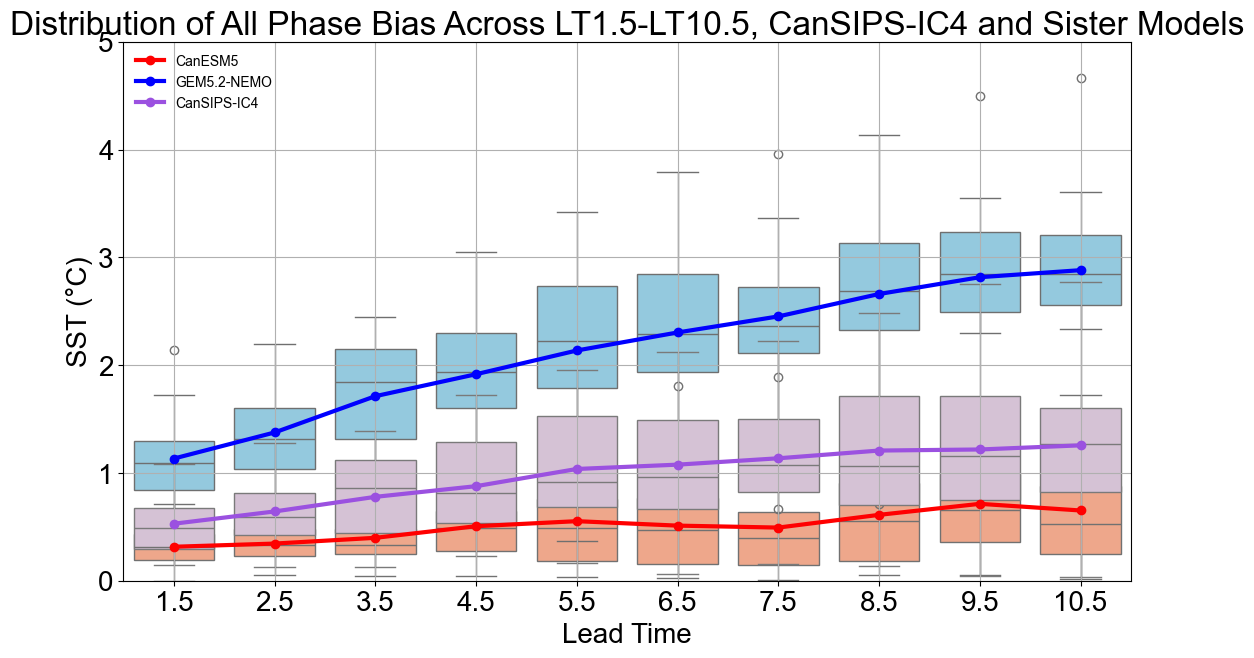

In [32]:
#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def all_IC4_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(canesm_all_onset_mean['L']-1.5, canesm_all_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'CanESM5', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canesm_all_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_all_onset_mean['L']-1.5, nemo_all_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_all_onset, color = 'skyblue', zorder=1)

    plt.plot(canada_all_onset_mean['L']-1.5, canada_all_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='#9B51E0', label = 'CanSIPS-IC4', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=canada_all_onset, color = 'thistle', zorder=1)
    #sns.scatterplot(x='L', y='BIAS', data=gfdl_all_onset, color = 'black', zorder=2)
    
    # Customize the plot
    plt.title(f'Distribution of All Phase Bias Across LT1.5-LT10.5, CanSIPS-IC4 and Sister Models', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/all_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


all_IC4_visualizer()


In [33]:
#Nemo 5 and Nemo 5.2 
nemo_old = pd.read_csv('../Resources/FULL_LDC_GEM5_NEMO.csv')
nemo_old['LDC_SST_GEM5_NEMO'] = nemo_old['LDC_SST_GEM5_NEMO'] - 273.15

def nemo_old_onset_finder(dict):

    nemo_old_temp = nemo_old.copy()

    # Query the DataFrame
    nemo_old_onset = nemo_old_temp[
        (nemo_old_temp['TAR'].dt.year == dict["year"]) &
        (nemo_old_temp['TAR'].dt.month == dict["month"]) &
        (nemo_old_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_old_onset
    
nemo_old['MON'] = pd.to_datetime(nemo_old['MON'], format = '%H%M %d %b %Y')
nemo_old['START'] = nemo_old['MON'].dt.month
nemo_old['TARGET'] = ((nemo_old['START'] + nemo_old['L']).astype(int))%12
nemo_old['TARGET'] = nemo_old['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo_old['TAR'] = nemo_old.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo_old['TAR'] = nemo_old.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo_old['SZN'] = nemo_old['TARGET'].map(month_to_season)
nemo_old = nemo_old[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM5_NEMO']]
nemo_old = nemo_old.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo_old DataFrame
nemo_old.loc[:, 'OBS_NINO3.4_L3'] = nemo_old['TAR'].map(obs_dict)

# Calculate BIAS
nemo_old.loc[:, 'BIAS'] = nemo_old['LDC_SST_GEM5_NEMO'] - nemo_old['OBS_NINO3.4_L3']
nemo_old_warm_onset_dfs = {}
nemo_old_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    nemo_old_warm_onset_dfs[f'{j}'] = nemo_old_onset_finder(i)
    j += 1

nemo_old_warm_onset = pd.concat([nemo_old_warm_onset_dfs[key] for key in nemo_old_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_old_cold_onset_dfs[f'{j}'] = nemo_old_onset_finder(i)
    j += 1

nemo_old_cold_onset = pd.concat([nemo_old_cold_onset_dfs[key] for key in nemo_old_cold_onset_dfs.keys()], ignore_index=True)

nemo_old_all_onset = pd.concat([nemo_old_cold_onset,nemo_old_warm_onset], ignore_index=True)
nemo_old_all_onset['BIAS_ABS'] = nemo_old_all_onset['BIAS'].abs()
nemo_old_cold_onset['BIAS_ABS'] = nemo_old_cold_onset['BIAS'].abs()
nemo_old_warm_onset['BIAS_ABS'] = nemo_old_warm_onset['BIAS'].abs()

nemo_old_warm_onset_mean = nemo_old_warm_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nemo_old_cold_onset_mean = nemo_old_cold_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()
nemo_old_all_onset_mean = nemo_old_all_onset.groupby(['L'])['BIAS_ABS'].mean().reset_index()

nemo_old_warm_onset_mean.to_csv('../Resources/nemo_old_warm_onset_mean.csv', index=False)
nemo_old_all_onset_mean.to_csv('../Resources/nemo_old_all_onset_mean.csv', index=False)
nemo_old_cold_onset_mean.to_csv('../Resources/nemo_old_cold_onset_mean.csv', index=False)
nemo_old_warm_onset.to_csv('../Resources/nemo_old_warm_onset.csv', index=False)
nemo_old_all_onset.to_csv('../Resources/nemo_old_all_onset.csv', index=False)
nemo_old_cold_onset.to_csv('../Resources/nemo_old_cold_onset.csv', index=False)

nemo_old_all_onset_mean


,L,BIAS_ABS
0,1.5,1.108226
1,2.5,1.354432
2,3.5,1.607595
3,4.5,1.942558
4,5.5,2.092979
5,6.5,2.285074
6,7.5,2.554869
7,8.5,2.777535
8,9.5,2.989424
9,10.5,3.076991


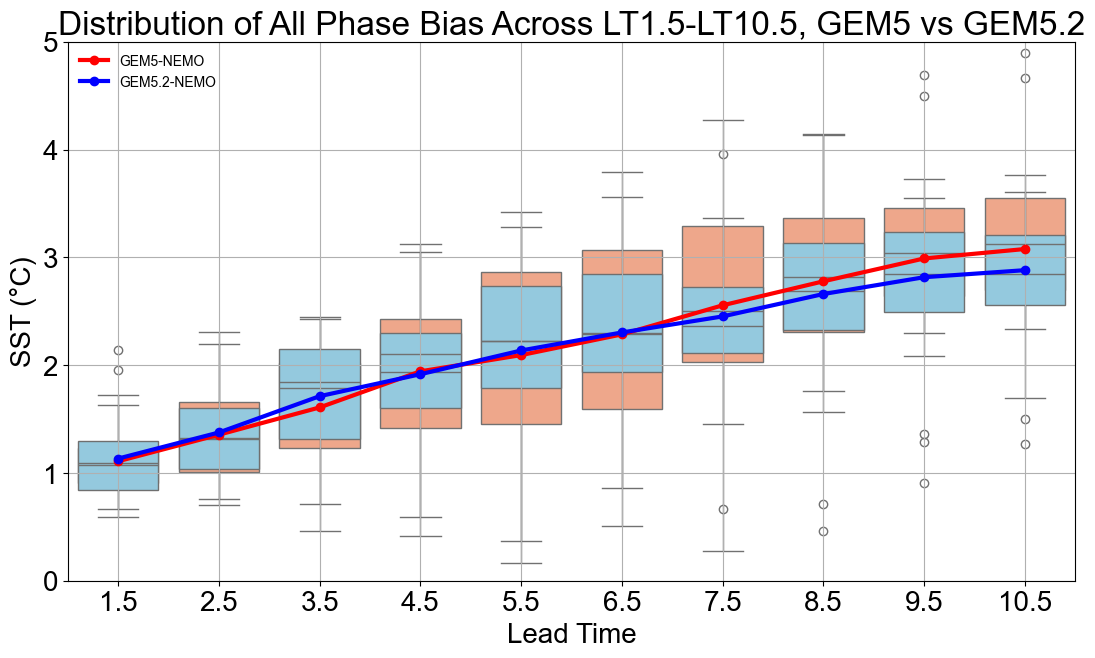

In [34]:
#Nemo 5 and Nemo 5.2 






#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def all_nemo_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(nemo_old_all_onset_mean['L']-1.5, nemo_old_all_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'GEM5-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_old_all_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_all_onset_mean['L']-1.5, nemo_all_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_all_onset, color = 'skyblue', zorder=1)


    
    # Customize the plot
    plt.title(f'Distribution of All Phase Bias Across LT1.5-LT10.5, GEM5 vs GEM5.2', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/all_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


all_nemo_visualizer()


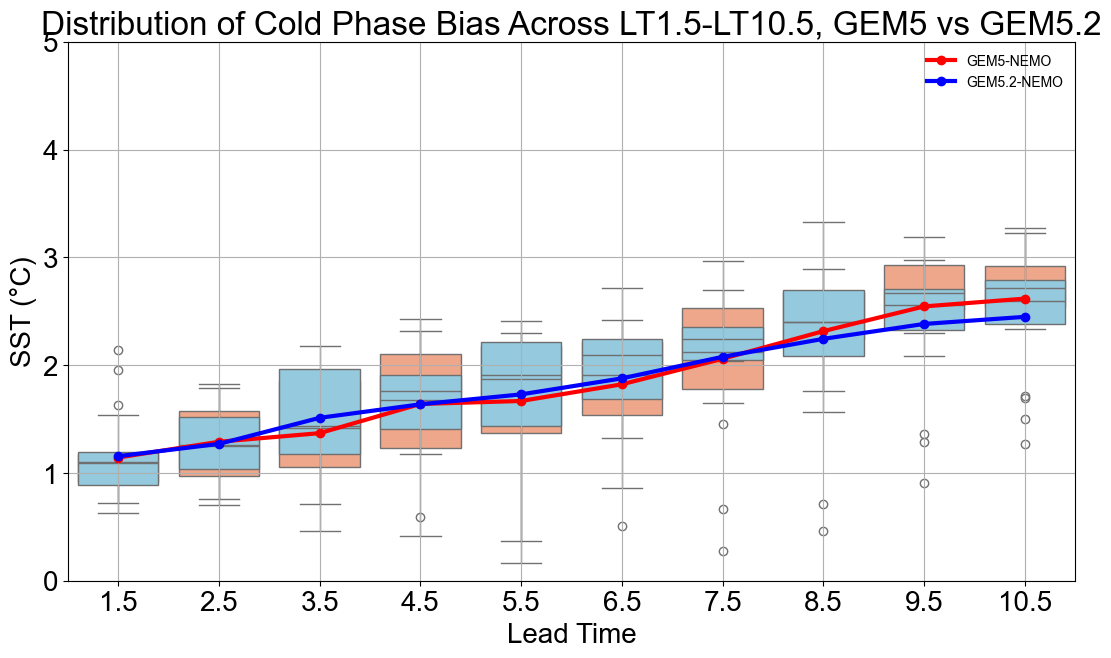

In [35]:
#Nemo 5 and Nemo 5.2 






#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def cold_nemo_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(nemo_old_cold_onset_mean['L']-1.5, nemo_old_cold_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'GEM5-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_old_cold_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_cold_onset_mean['L']-1.5, nemo_cold_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_cold_onset, color = 'skyblue', zorder=1)


    
    # Customize the plot
    plt.title(f'Distribution of Cold Phase Bias Across LT1.5-LT10.5, GEM5 vs GEM5.2', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/cold_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


cold_nemo_visualizer()


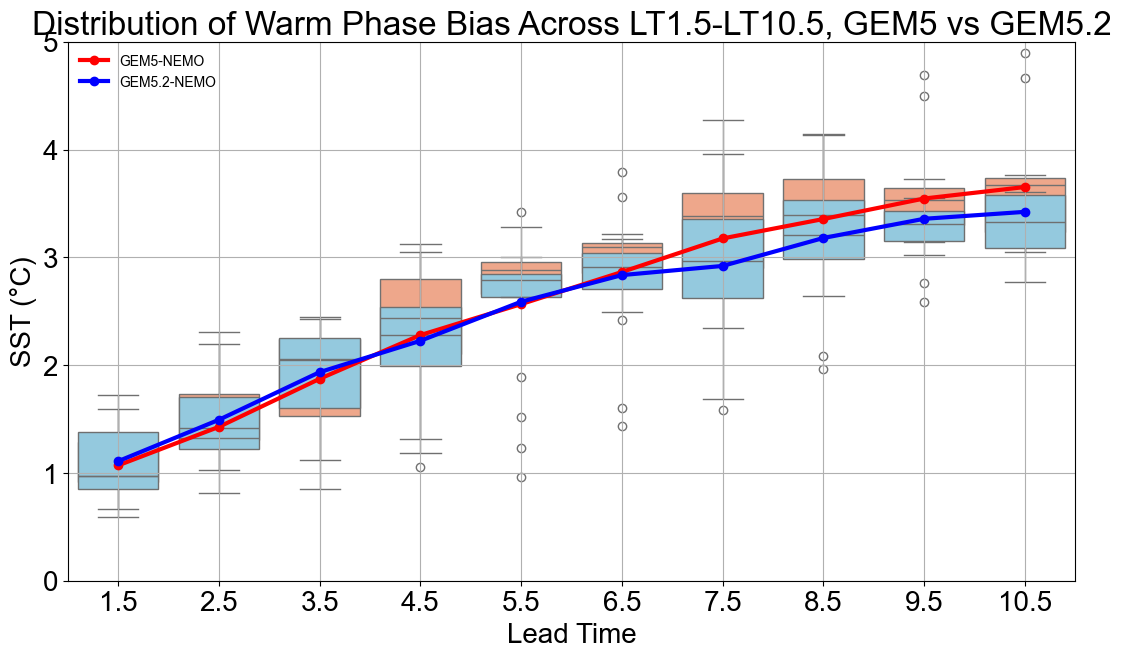

In [36]:
#Nemo 5 and Nemo 5.2 






#notice how certain CanSIPS-IC4 sisters has such a high MAE. let's visualize this


def warm_nemo_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(nemo_old_warm_onset_mean['L']-1.5, nemo_old_warm_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='red', label = 'GEM5-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_old_warm_onset, color = 'lightsalmon', zorder=1)

    plt.plot(nemo_warm_onset_mean['L']-1.5, nemo_warm_onset_mean['BIAS_ABS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='blue', label = 'GEM5.2-NEMO', zorder=2)
    sns.boxplot(x='L', y='BIAS_ABS', data=nemo_warm_onset, color = 'skyblue', zorder=1)


    
    # Customize the plot
    plt.title(f'Distribution of Warm Phase Bias Across LT1.5-LT10.5, GEM5 vs GEM5.2', size = 24)
    plt.xlabel('Lead Time', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax = 5)
    #plt.savefig(f'../Plots/Obs/warm_distribution_and_mean.png', format='png')
    # Show the plot
    
    plt.show() 


warm_nemo_visualizer()
